In [14]:
import numpy as np
#import tensorflow as  tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10 as cifar10
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import random as rd
from tensorflow.keras.callbacks import Callback

#### Carga de los datos

In [79]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [80]:
print(x_train.shape[0:])
print(y_train.shape[0:])

(50000, 32, 32, 3)
(50000, 1)


In [81]:
# Se covierten las salidas de una forma codificada para que lo entienda mejopr el modelo
# La forma es one hot encoding
Y_train = np_utils.to_categorical(y_train, 10) #10 -> número de etiquetas de los target
Y_test = np_utils.to_categorical(y_test, 10)

In [82]:
class criterio_de_parada(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') <= 0.2):
            self.model.stop_trainig = True

In [83]:
criterio_parada = criterio_de_parada()

In [84]:
model = Sequential()

#Creación de capas de convolución con dropout = 0.25
model.add(Conv2D(256, (3, 3), activation='relu', padding='same',input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.25))

#Capa de salida.
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

#Declaramos para el optimizador adam un learning rate espefífico
adam= Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [98]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 32, 32, 256)       7168      
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 16, 16, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 16, 16, 128)       295040    
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 8, 8, 128)         0         
                                                                 
 conv2d_58 (Conv2D)          (None, 8, 8, 64)        

In [85]:
#Entrenamos nuestra red  y la evaluamos obteniendo los valores de error y accuracy de los datos de entrenamiento
hystory = model.fit(x_train, Y_train, batch_size=64, epochs=200, validation_data=(x_test, Y_test), callbacks = criterio_parada)

error = model.evaluate(x_test, Y_test)

Epoch 1/200
782/782 [==============================] - 10s 12ms/step - loss: 2.1805 - accuracy: 0.2199 - val_loss: 1.7807 - val_accuracy: 0.3457
Epoch 2/200
782/782 [==============================] - 9s 12ms/step - loss: 1.7018 - accuracy: 0.3645 - val_loss: 1.5664 - val_accuracy: 0.4065
Epoch 3/200
782/782 [==============================] - 9s 12ms/step - loss: 1.5318 - accuracy: 0.4377 - val_loss: 1.4189 - val_accuracy: 0.4834
Epoch 4/200
782/782 [==============================] - 9s 12ms/step - loss: 1.4205 - accuracy: 0.4827 - val_loss: 1.2827 - val_accuracy: 0.5455
Epoch 5/200
782/782 [==============================] - 9s 12ms/step - loss: 1.3340 - accuracy: 0.5179 - val_loss: 1.1849 - val_accuracy: 0.5849
Epoch 6/200
782/782 [==============================] - 9s 12ms/step - loss: 1.2661 - accuracy: 0.5444 - val_loss: 1.1468 - val_accuracy: 0.5983
Epoch 7/200
782/782 [==============================] - 9s 12ms/step - loss: 1.2088 - accuracy: 0.5653 - val_loss: 1.0937 - val_accuracy

782/782 [==============================] - 9s 12ms/step - loss: 0.6558 - accuracy: 0.7758 - val_loss: 0.7002 - val_accuracy: 0.7615
Epoch 58/200
782/782 [==============================] - 9s 12ms/step - loss: 0.6428 - accuracy: 0.7802 - val_loss: 0.6913 - val_accuracy: 0.7677
Epoch 59/200
782/782 [==============================] - 9s 12ms/step - loss: 0.6388 - accuracy: 0.7829 - val_loss: 0.7127 - val_accuracy: 0.7613
Epoch 60/200
782/782 [==============================] - 9s 12ms/step - loss: 0.6412 - accuracy: 0.7827 - val_loss: 0.6753 - val_accuracy: 0.7731
Epoch 61/200
782/782 [==============================] - 9s 12ms/step - loss: 0.6393 - accuracy: 0.7837 - val_loss: 0.6887 - val_accuracy: 0.7744
Epoch 62/200
782/782 [==============================] - 9s 12ms/step - loss: 0.6334 - accuracy: 0.7839 - val_loss: 0.7221 - val_accuracy: 0.7617
Epoch 63/200
782/782 [==============================] - 9s 12ms/step - loss: 0.6282 - accuracy: 0.7874 - val_loss: 0.7253 - val_accuracy: 0.756

782/782 [==============================] - 9s 12ms/step - loss: 0.5455 - accuracy: 0.8169 - val_loss: 0.7027 - val_accuracy: 0.7777
Epoch 114/200
782/782 [==============================] - 9s 12ms/step - loss: 0.5389 - accuracy: 0.8214 - val_loss: 0.6842 - val_accuracy: 0.7805
Epoch 115/200
782/782 [==============================] - 9s 12ms/step - loss: 0.5364 - accuracy: 0.8230 - val_loss: 0.6673 - val_accuracy: 0.7838
Epoch 116/200
782/782 [==============================] - 9s 12ms/step - loss: 0.5314 - accuracy: 0.8217 - val_loss: 0.7104 - val_accuracy: 0.7794
Epoch 117/200
782/782 [==============================] - 9s 11ms/step - loss: 0.5356 - accuracy: 0.8225 - val_loss: 0.6996 - val_accuracy: 0.7772
Epoch 118/200
782/782 [==============================] - 9s 11ms/step - loss: 0.5303 - accuracy: 0.8232 - val_loss: 0.6819 - val_accuracy: 0.7824
Epoch 119/200
782/782 [==============================] - 9s 11ms/step - loss: 0.5258 - accuracy: 0.8252 - val_loss: 0.6512 - val_accuracy:

782/782 [==============================] - 9s 12ms/step - loss: 0.4852 - accuracy: 0.8408 - val_loss: 0.6807 - val_accuracy: 0.7857
Epoch 170/200
782/782 [==============================] - 9s 12ms/step - loss: 0.4873 - accuracy: 0.8409 - val_loss: 0.6936 - val_accuracy: 0.7821
Epoch 171/200
782/782 [==============================] - 9s 12ms/step - loss: 0.4902 - accuracy: 0.8393 - val_loss: 0.6854 - val_accuracy: 0.7861
Epoch 172/200
782/782 [==============================] - 9s 12ms/step - loss: 0.4916 - accuracy: 0.8388 - val_loss: 0.7061 - val_accuracy: 0.7788
Epoch 173/200
782/782 [==============================] - 10s 12ms/step - loss: 0.4772 - accuracy: 0.8437 - val_loss: 0.7020 - val_accuracy: 0.7785
Epoch 174/200
782/782 [==============================] - 9s 12ms/step - loss: 0.4802 - accuracy: 0.8429 - val_loss: 0.7146 - val_accuracy: 0.7792
Epoch 175/200
782/782 [==============================] - 10s 12ms/step - loss: 0.4749 - accuracy: 0.8439 - val_loss: 0.6880 - val_accurac

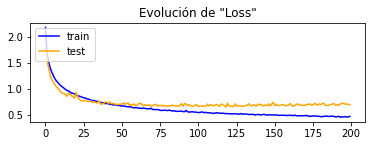

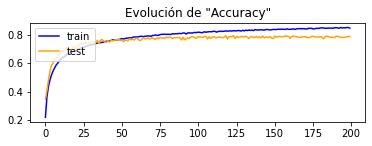

In [86]:
# la validación, para evaluar el aprendizaje del modelo.
# Gráfica de evolución de "loss".
plt.subplot(211)
plt.title('Evolución de "Loss"')
plt.plot(hystory.history['loss'], color='blue', label='train')
plt.plot(hystory.history['val_loss'], color='orange', label='test')
plt.legend(loc='upper left')
plt.show()

# Gráfica de evolución de "accuracy". 
plt.subplot(212)
plt.title('Evolución de "Accuracy"')
plt.plot(hystory.history['accuracy'], color='blue', label='train')
plt.plot(hystory.history['val_accuracy'], color='orange', label='test')
plt.legend(loc='upper left')
plt.show()

##### Predicción imagenes

In [87]:
def prediccion(prediccion,img):
    plt.imshow(img)
    # Obtención de los ínidices de mayor a menor
    indices = prediccion.argsort()[-3:][::-1]
    #Cogemos los 3 más altos, que están al final del array
    top3 = indices[0][-3:][::-1]
    for x in top3:
        if(x==0):
            print('Avion')
        elif(x==1):
            print('Coche')
        elif(x==2):
            print('Pajaro')
        elif(x==3):
            print('Gato')
        elif(x==4):
            print('Ciervo')
        elif(x==5):
            print('Perro')
        elif(x==6):
            print('Rana')
        elif(x==7):
            print('Caballo')
        elif(x==8):
            print('Barco')
        elif(x==9):
                print('Tractor')
        print('Con una probabilidad de: ', prediccion[0][x])

In [88]:
#Se cogen las imágenes aleatoriamente del dataset y se utilizaran para validation
x = rd.randint(0,50000-1)
img1 = x_train[x]
x = rd.randint(0,50000-1)
img2 = x_train[x]
x = rd.randint(0,50000-1)
img3 = x_train[x]
x = rd.randint(0,50000-1)
img4 = x_train[x]
x = rd.randint(0,50000-1)
img5 = x_train[x]
x = rd.randint(0,50000-1)
img6 = x_train[x]
x = rd.randint(0,50000-1)
img7 = x_train[x]
x = rd.randint(0,50000-1)
img8 = x_train[x]

1/1 [==============================] - 0s 127ms/step
Ciervo
Con una probabilidad de:  0.9999927
Caballo
Con una probabilidad de:  4.773779e-06
Perro
Con una probabilidad de:  2.3978075e-06


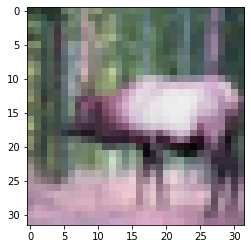

In [89]:
prueb1 = np.array([img1])

#Hacemos predict en la red con la imagen determinada
prediccion1 = model.predict(prueb1)

prediccion(prediccion1,img1)


1/1 [==============================] - 0s 13ms/step
Pajaro
Con una probabilidad de:  0.97979486
Avion
Con una probabilidad de:  0.019736288
Gato
Con una probabilidad de:  0.0002774197


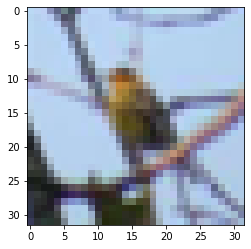

In [90]:
prueb2 = np.array([img2])
prediccion2 = model.predict(prueb2)
prediccion(prediccion2,img2)

1/1 [==============================] - 0s 14ms/step
Avion
Con una probabilidad de:  0.9879637
Ciervo
Con una probabilidad de:  0.004041357
Pajaro
Con una probabilidad de:  0.0034031381


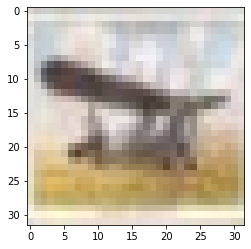

In [91]:
prueb3 = np.array([img3])
prediccion3 = model.predict(prueb3)
prediccion(prediccion3,img3)

1/1 [==============================] - 0s 13ms/step
Rana
Con una probabilidad de:  0.9915639
Gato
Con una probabilidad de:  0.008049573
Ciervo
Con una probabilidad de:  0.00019478583


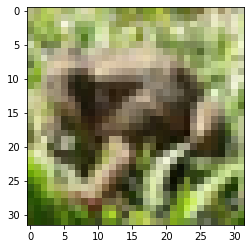

In [92]:
prueb4 = np.array([img4])
prediccion4 = model.predict(prueb4)
prediccion(prediccion4,img4)

1/1 [==============================] - 0s 13ms/step
Ciervo
Con una probabilidad de:  0.9791711
Perro
Con una probabilidad de:  0.00758699
Gato
Con una probabilidad de:  0.0051401793


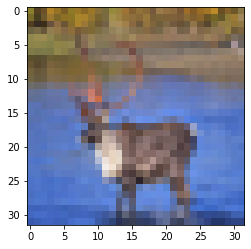

In [93]:
prueb5 = np.array([img5])
prediccion5 = model.predict(prueb5)
prediccion(prediccion5,img5)

1/1 [==============================] - 0s 14ms/step
Pajaro
Con una probabilidad de:  0.5094518
Perro
Con una probabilidad de:  0.18400954
Gato
Con una probabilidad de:  0.17588092


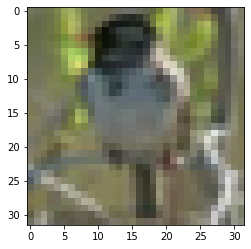

In [94]:
prueb6 = np.array([img6])
prediccion6 = model.predict(prueb6)
prediccion(prediccion6,img6)

1/1 [==============================] - 0s 15ms/step
Avion
Con una probabilidad de:  0.9983612
Barco
Con una probabilidad de:  0.00079996
Tractor
Con una probabilidad de:  0.00027984995


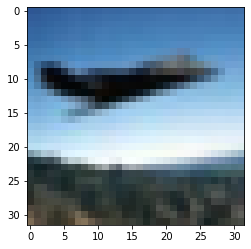

In [95]:
prueb7 = np.array([img7])
prediccion7 = model.predict(prueb7)
prediccion(prediccion7,img7)

1/1 [==============================] - 0s 13ms/step
Perro
Con una probabilidad de:  0.5234157
Gato
Con una probabilidad de:  0.40319338
Caballo
Con una probabilidad de:  0.018840997


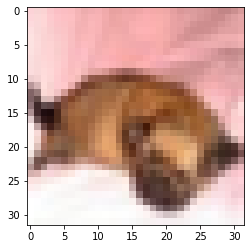

In [96]:
prueb8 = np.array([img8])
prediccion8 = model.predict(prueb8)
prediccion(prediccion8,img8)

In [145]:
prediccion1.argsort()[::-1]

array([[7, 3, 8, 4, 0, 1, 2, 6, 9, 5]], dtype=int64)

In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)